## PARCIAL#2

- 1).EL LÍMITE DE DIFRACCIÓN DE UN TELESCOPIO

Nuestra capacidad para resolver detalles en observaciones astronómicas está limitada por la difracción de la luz en nuestros telescopios. La luz de las estrellas se puede tratar de manera efectiva como proveniente de una fuente puntual en el infinito. Cuando dicha luz, con longitud de onda $\lambda $, atraviesa la abertura circular de un telescopio (que asumiremos que tiene un radio unitario) y es enfocada por el telescopio en el plano focal, produce no solo un punto, sino una serie de anillos concéntricos. La intensidad de la luz en este patrón de difracción viene dada por:
\begin{equation}
I(r)=\left (\frac{J_{1}\left ( kr \right )}{kr}  \right )^{2}
\end{equation}
\
donde $r$ es la distancia en el plano focal desde el centro del patrón de diferencia, $k=2\pi/\lambda$ y $J_{1}(x)$ es una función de bessel. Las funciones de bessel  $J_{m}(x)$ están dadas por:
\begin{equation}
J_{m}\left ( x \right )=\frac{1}{\pi }\int_{0}^{\pi }cos\left ( m\theta -xsin\theta  \right )d\theta 
\end{equation}
\
donde $ m $ es un entero no negativo y $x\geq 0$
- a.)Escriba una función de Python $ J (m, x) $ que calcule el valor de $J_{m}(x)$ usando la regla de simpson con $N=1000$ puntos. Use su función en un programa para hacer un diagrama, en una sola gráfica, de Bessel funciona $J_{0}$, $J_{1}$ y $J_{2}$ en función de $x$ de $x = 0$ a $x = 20$.
- b.) Haga un segundo programa que haga un diagrama de densidad de la intensidad del patrón de difracción circular de una fuente de luz puntual con $\lambda=500nm$, en una región cuadrada del plano focal, utilizando la fórmula dada anteriormente. Su imagen debe cubrir los valores de $r$ desde cero hasta aproximadamente $1\mu m$.

* **Sugerencia 1**: Puede resultarle útil saber que  $\lim_{x \mapsto 0 }J_{1}\left ( x\right )/x=\frac{1}{2}$.
* **Sugerencia 2**: El punto central en el patrón de difracción es tan brillante que puede ser difícil ver los anillos a su alrededor en la pantalla de la computadora. Si se encuentra con este problema, una forma sencilla de resolverlo es utilizar uno de los otros esquemas de color para los gráficos de densidad descritos en la sección 3.3. El esquema "activo" funciona bien. Para una solución más sofisticada al problema, el $inshow$ La función tiene un argumento adicional $Vmax$ que le permite establecer el valor que corresponde al punto más brillante de la gráfica. por ejemplo, si dices $"inshow(x,Vmax=0.1)"$, entonceslos elementos en $x$ con un valor $0.1$, o cualquier valor mayor, producirán el color más brillante (más positivo) en la pantalla. Al reducir el valor $Vmax$, puede reducir el rango total de valores entre el brillo mínimo y máximo, y por lo tanto aumentar el sensibilidad de la trama, haciendo visibles detalles sutiles. (También hay un argumento $Vmin$ que puede usarse para depositar el valor que corresponde al color más oscuro (más negativo).) Para este ejercicio, un valor de $Vmax = 0.01$ parece funcionar bien .

In [1]:
#a.)
from pylab import scatter,xlabel,ylabel,xlim,ylim,show
from numpy import loadtxt
from pylab import imshow, gray, show
from numpy import loadtxt
from numpy import loadtxt, shape
from matplotlib.pyplot import plot as plt
from scipy.special import jn
from math import sin, cos, pi

#  La función central de la integral de Bessel
def f(m, x, t):
    return cos(m * t - x * sin(t))

#El número de pasos utilizados en la aproximación integral de Simpson.
N = 1000

def J(m, x):
    ''' Función aproximada de Bessel Jm (x) para el entero m '''

    # límites inferior y superior de la integral
    a = 0.0
    b = pi

    # valor de h
    h = (b - a) / N

    # Suma los valores para la integración de Simpson
    s = f(m, x, a) + f(m, x, b)
    for i in range(1, N):
        t = a + i * h
        if i % 2 == 1:
            s += 4.0 * f(m, x, t)
        else:
            s += 2.0 * f(m, x, t)

    # multiplica por h / 3 para obtener la integral y dividir por pi para obtener la función Bessel.
    return s * h / (3.0 * pi) 

for x in range(21):
    print(x, J(0, x), J(1, x), J(2, x))
   



0 1.0 3.597122599785507e-17 5.166237807922395e-17
1 0.7651976865579667 0.44005058574493305 0.11490348493190024
2 0.22389077914123573 0.5767248077568741 0.35283402861563795
3 -0.2600519549019338 0.3390589585259367 0.4860912605858908
4 -0.39714980986384707 -0.06604332802354927 0.3641281458520718
5 -0.1775967713143381 -0.32757913759146534 0.046565116277752505
6 0.15064525725099684 -0.2766838581275658 -0.24287320996018577
7 0.3000792705195554 -0.004682823482345872 -0.30141722008593974
8 0.17165080713755368 0.23463634685391468 -0.1129917204240753
9 -0.09033361118287589 0.2453117865733257 0.1448473415325039
10 -0.2459357644513479 0.04347274616886139 0.25463031368512073
11 -0.17119030040719607 -0.17678529895672143 0.13904751877870147
12 0.04768931079683338 -0.22344710449062802 -0.08493049487860464
13 0.2069261023770678 -0.0703180521217784 -0.21774426424195703
14 0.1710734761104587 0.1333751546987932 -0.15201988258205953
15 -0.014224472826780915 0.20510403861352272 0.04157167797525051
16 -0.17

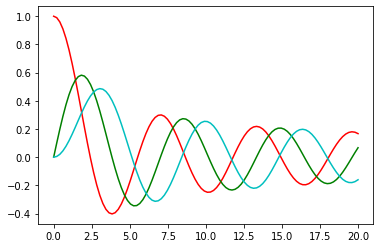

In [2]:
import numpy as np
import pylab as plt
import math as mathy

#Plot J0,J1,J2
xpuntos= np.linspace(0,20,100)
J0=[]
J1=[]
J2=[]
for x in xpuntos:
    J0.append(J(0,x))
    J1.append(J(1,x))
    J2.append(J(2,x))
plt.plot(xpuntos,J0,"r")  
plt.plot(xpuntos,J1,"g") 
plt.plot(xpuntos,J2,"c") 
plt.show()

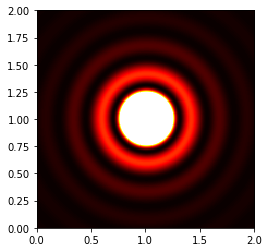

In [3]:
#b.)
import numpy as np
import math
from math import sqrt,sin,pi

def r(x,y):
    return math.sqrt(x**2+y**2)
def I(r):
    if (r==0):
        return 1/4
    
    lmda=0.5
    kr=2*pi/lmda*r
    return (J(1,kr)/kr)**2
lado=2
puntos=200
espacio=lado/puntos

xcentro=lado/2
ycentro=lado/2

intensidad =np.empty([puntos,puntos],float)

for i in range(puntos):
    y=espacio*i
    for j in range(puntos):
        x=espacio*j
        dist=r(x-xcentro,y-ycentro)
        intensidad[i,j]=I(dist)

plt.imshow(intensidad,origin="lower",extent=[0,lado,0,lado],vmax=0.01)
plt.hot()
plt.show()

# 2.SIMULACION DEL CAMPO ELECRICO
TENIENDO EN CUENTA LA SIGUIENTE SITUACION DE LA FIGURA:
Y SABIENDO :
- siempre que se estudien dos elementos que tenga de $dq$ que tengan la misma distancia respecto al punto $P$,estos generan las mismas componentes $dE_{x}$ pero en sentidos opuestos por lo tanto se anulan.


$dE=?$

\begin{equation}
E=K\frac{Q}{r^{2}}\rightarrow dE=K\frac{dq}{r^{2}}\rightarrow dE_{y}=dEcos\left ( \theta  \right )
\end{equation}
\
\begin{equation}
dE_{y}=k\frac{dq}{r^{2}}cos\left ( \theta  \right )
\end{equation}
\
\begin{equation}
cos(\theta )=\frac{y}{\sqrt{x^{2}+y^{2}}}
\end{equation}
\
\
\begin{equation}
dE_{y}=k\frac{ydq}{r^{2}\sqrt{x^{2}+y^{2}}}
\end{equation}
\

\begin{equation}
r=\sqrt{x^{2}+y^{2}}
\end{equation}
\
\begin{equation}
dE_{y}=k\frac{ydq}{\left ( \sqrt{x^{2}+y^{2}} \right )^{2}\sqrt{x^{2}+y^{2}}}
\end{equation}
\
\
\begin{equation}
E_{y}=2k\int_{0}^{\frac{l}{2}}\frac{dq}{\left ( x^{2}+y^{2} \right )^{\frac{3}{2}}}
\end{equation}
\
\begin{equation}
E_{y}=2k\int_{0}^{\frac{l}{2}}\frac{dq}{\left ( x^{2}+y^{2} \right )^{\frac{3}{2}}}
\end{equation}
\
\begin{equation}
E_{y}=2kdq\int_{0}^{\frac{l}{2}}\frac{dx}{\left ( x^{2}+y^{2} \right )^{\frac{3}{2}}}
\end{equation}
\

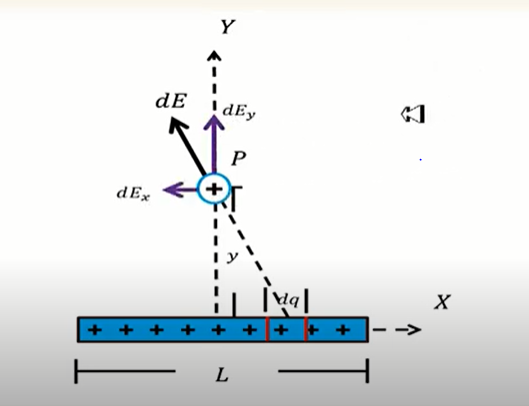

In [4]:
from IPython.display import Image
Image(filename='captura.PNG')


In [5]:
from __future__ import division
import numpy as np
import matplotlib.pylab as plt
import numpy as np
from pylab import scatter,xlabel,ylabel,xlim,ylim,show
from numpy import loadtxt
from pylab import imshow, gray, show
from numpy import loadtxt
from numpy import loadtxt, shape
from matplotlib.pyplot import plot as plt
from scipy.special import jn
from math import sin, cos, pi


#metodo de simpson
#Importamos math
from math import *
 
#Definimos la funcion
#@ n: numero de x
#@ a y b los intervalos de la integral
#@ f: La funcion a integrar
def simpson13(n, a, b, f):
    #calculamos h
    h = (b - a) / n
    #Inicializamos nuestra varible donde se almacenara las sumas
    suma = 0.0
    #hacemos un ciclo para ir sumando las areas
    for i in range(1, n):
        #calculamos la x
        #x = a - h + (2 * h * i)
        x = a + i * h
        # si es par se multiplica por 4
        if(i % 2 == 0):
            suma = suma + 2 * fx(x, f)
        #en caso contrario se multiplica por 2
        else:
            suma = suma + 4 * fx(x, f)
    #sumamos los el primer elemento y el ultimo
    suma = suma + fx(a, f) + fx(b, f)
    #Multiplicamos por h/3
    rest = suma * (h / 3)
    #Retornamos el resultado
    return (rest)
 
#Funcion que nos ayuda a evaluar las funciones
def fx(x, f):
    return eval(f)
#valores de ejemplo para la funcion sin(x) con intervalos de
n = 100
a = 0.0
#ingresamos la carga q o se la pedimos al usuario
q=7
#longitud de la barra ose la pedimos al usuario
l=20
b = l/2
#distancia del punto a la barra ose la pedimos al usuario
y=10
#constante 
k=9*10**9 #N·m2/C2
lmda=q/l
dq=lmda*y
f = '(k*dq)*(1/((x**2+y**2)**3/2))'
 
print(simpson13(n, a, b, f))

343050.3159976378
